In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

df=pd.read_csv(r'..\csv_files\Online Retail.csv')

df['Description'] = df['Description'].fillna('').astype(str)

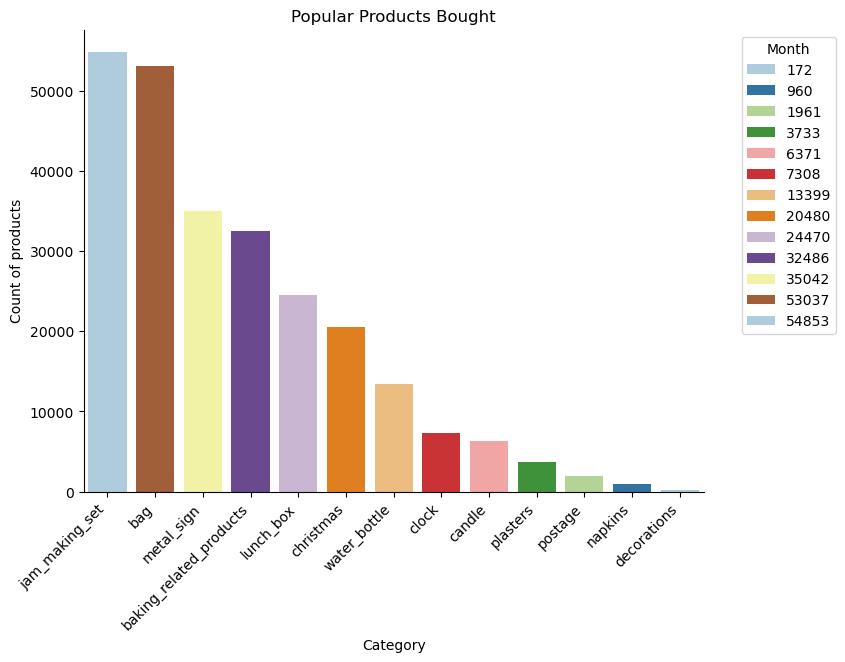

In [2]:
category_list = [
    "baking_related_products",
    "bag",
    "postage",
    "jam_making_set",
    "lunch_box",
    "clock",
    "water_bottle",
    "candle",
    "christmas",
    "metal_sign",
    "napkins",
    "plasters",
    "decorations",
    "other"
]

category_dict = {category: [] for category in category_list}
# Helper function to handle plural forms and special cases
def match_phrase(description, keyword):
    # Convert to lowercase for case-insensitive matching
    description = description.lower()
    keyword = keyword.lower()
    
    # Basic match
    if keyword in description:
        return True
    
    # Handle plural forms
    if keyword + 's' in description:
        return True
    
    return False

# Categorize descriptions
def categorize_description(description):
    description_lower = description.lower()
    
    # Special condition for baking_related_products
    if match_phrase(description_lower, 'cake') or \
       match_phrase(description_lower, 'baking') or \
       match_phrase(description_lower, 'cookie cutter'):
        category_dict['baking_related_products'].append(description)
        return 'baking_related_products'
    
    # Check for other categories
    for category in category_dict:
        if category != 'baking_related_products':  # Skip baking_related_products since it's handled separately
            for keyword in category.split('_'):
                if match_phrase(description_lower, keyword):
                    category_dict[category].append(description)
                    return category

    category_dict['other'].append(description)
    return 'other'

df['Category'] = df['Description'].apply(categorize_description)

df_plot=df['Category'].value_counts().to_frame().reset_index()
df_plot.drop(0,inplace=True)
df_plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_plot, x='Category', y='count', hue='count', palette='Paired')
sns.despine()

plt.title('Popular Products Bought')
plt.xlabel('Category')
plt.ylabel('Count of products')
plt.xticks(rotation=45,ha='right')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
